In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
#% matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM


In [3]:
df = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
df.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


<AxesSubplot:>

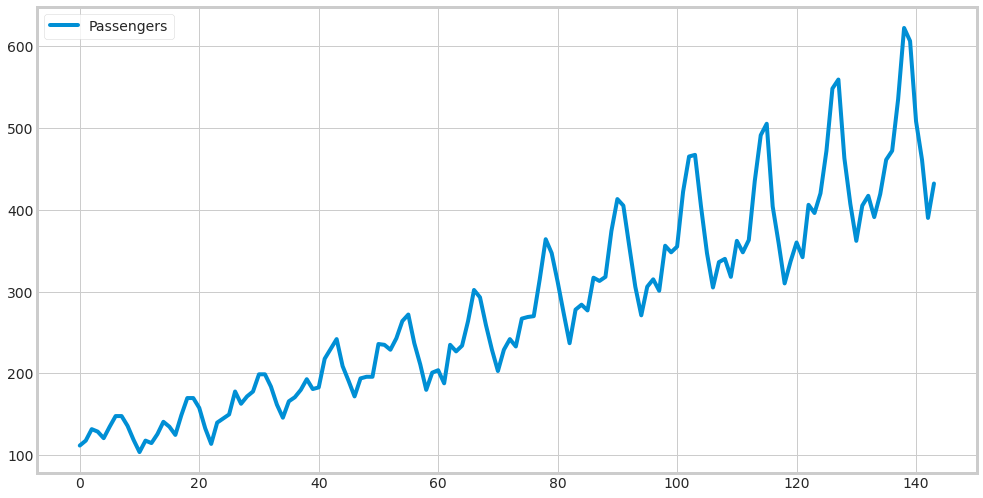

In [4]:
df.plot(figsize = (15,8))

In [6]:
data = df['Passengers']
data_set = data.values

data.max()

622

In [ ]:
data_set

array([ 1.461   ,  1.43    ,  1.39    , ..., 66.580002, 66.699997,
       67.519997])

In [7]:
data_set.shape

(144,)

In [8]:
data_set = data_set.reshape(-1,1)

In [9]:
data_set.shape

(144, 1)

In [ ]:
data_set

In [ ]:
#standardized the data
scaler = MinMaxScaler (feature_range = (0,1))
scaled_data = scaler.fit_transform(data_set)
scaled_data

In [ ]:
scaled_data.shape

In [ ]:
train_index = math.ceil(len(data_set)*0.67)
train_index

In [15]:
train_data = scaled_data[:train_index, :]
test_data = scaled_data[train_index:, :]

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
#60 days prediction
x_train = []
y_train = []
p = 1
for i in range(p, len(train_data)):
  x_train.append(train_data[i-p:i,0])
  y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

x_train.shape

In [25]:
#Model LSTM 
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, activation = "linear", input_shape = (p,1))) #input layer
model.add(LSTM(units = 50, return_sequences = True, activation = "linear",)) #hiden layer
model.add(LSTM(units = 50, return_sequences = True, activation = "linear",)) #hiden layer
model.add(LSTM(units = 100, return_sequences = False, activation = "linear", input_shape = (p,1))) #output layer
model.add(Dense(units =10, activation = "linear",))
model.add(Dense(units = 1, activation="linear"))

In [26]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
model.summary()

In [ ]:
model.fit(x_train, y_train, batch_size=20, epochs=20)

In [ ]:
#Here we are testing data set
test_data = scaled_data[train_index - p: , : ]
x_test = []
y_test = data_set[train_index : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column)
for i in range(p, len(test_data)):
  x_test.append(test_data[i-p: i, 0]) 

test_data.shape

In [31]:
x_test = np.array(x_test)

In [ ]:
#Here we are reshaping the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Now we are getting the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
pred = pd.DataFrame(predictions)
pred.columns = ["Predicted_value"]
pred.tail()

In [ ]:
df.tail()

In [ ]:
act_test = scaled_data[train_index : , : ]
pred.tail()

In [ ]:
act = pd.DataFrame(y_test)
act.columns = ["Actual_value"]
act.head()

In [ ]:
pd.concat([act, pred], axis=1).tail()

In [ ]:
np.mean((act["Actual_value"] - pred["Predicted_value"])**2)

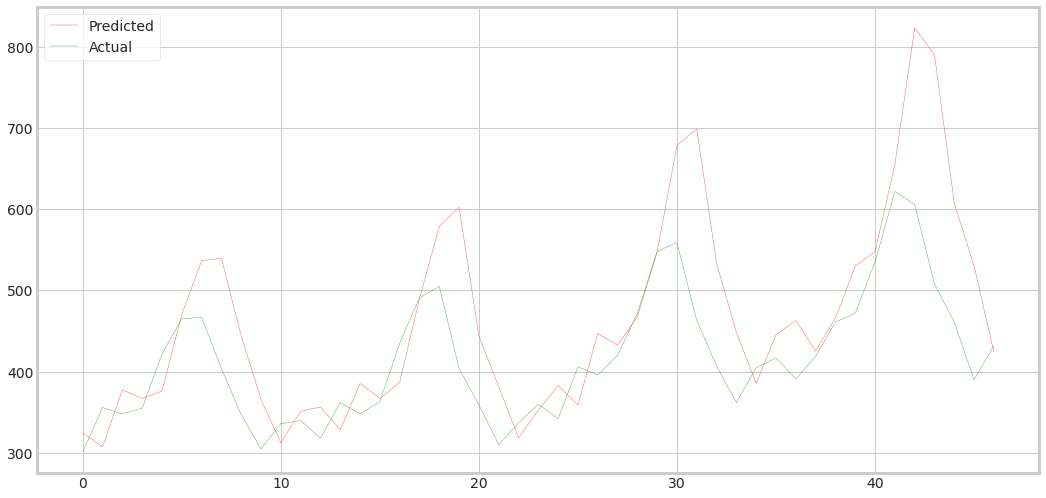

In [39]:
plt.figure(figsize = (16,8))
plt.plot(pred["Predicted_value"], label = "Predicted", color = "red", linewidth = '0.3')
plt.plot(act["Actual_value"], label = "Actual" , color = "green", linewidth = '0.3')
plt.legend()
plt.show()